## Importamos todos los paquetes aquí por comodidad

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [42]:
import os
os.getcwd()

'c:\\Users\\meryg\\OneDrive\\Escritorio\\ICAI IMAT\\Probabilidad y Estadística'

## Cargamos los datos con los que se trabaja

In [4]:
nom_fi_datos = 'datos proyectos.csv'

In [5]:
df_orig = pd.read_csv(nom_fi_datos)

# parseamos la fecha (cadena) para que sea un datetime con formato dd/mm/yyyy 
df_orig.FECHA = pd.to_datetime(df_orig.FECHA, format='%d/%m/%Y') 
s=df_orig.loc[:,'FECHA']
df_orig['DATE'] =  s.dt.date
del df_orig['FECHA']

# añadimos el año-semana para luego poder trabajar cómodamente con el dataframe
ywd=s.dt.isocalendar()
yw = 1000*ywd['year'] + ywd['week'] # por ejemplo 2022032 es la semana 32 del año 2022
df_orig['ANNO-SEMANA'] = yw

print('Tamaño de df_orig con los datos cargados:', df_orig.shape)
print('Dataframe con todos los datos leidos (filas: días, columnas: variables):')
print(df_orig)

Tamaño de df_orig con los datos cargados: (1627, 33)
Dataframe con todos los datos leidos (filas: días, columnas: variables):
          CR00      CR01      CR02      CR03      CR04      CR05      CR06  \
0     0.039126  0.035324  0.032842  0.031533  0.030857  0.030710  0.030730   
1     0.039032  0.035356  0.032867  0.031417  0.030783  0.030597  0.030657   
2     0.039508  0.035976  0.033711  0.032332  0.031694  0.031551  0.031673   
3     0.040454  0.036701  0.034026  0.032566  0.031944  0.031670  0.031479   
4     0.042847  0.039526  0.036950  0.035158  0.034001  0.033421  0.032762   
...        ...       ...       ...       ...       ...       ...       ...   
1622  0.037500  0.034070  0.031581  0.030255  0.029750  0.030143  0.032196   
1623  0.038127  0.034337  0.031761  0.030471  0.029983  0.030307  0.032492   
1624  0.038088  0.034451  0.031834  0.030294  0.029645  0.029982  0.032268   
1625  0.037944  0.034254  0.031777  0.030190  0.029627  0.029865  0.032261   
1626  0.039021  

### 1. Visión general de las series

In [6]:
# auxiliares útiles para la representación
fechas = df_orig.DATE.tolist()

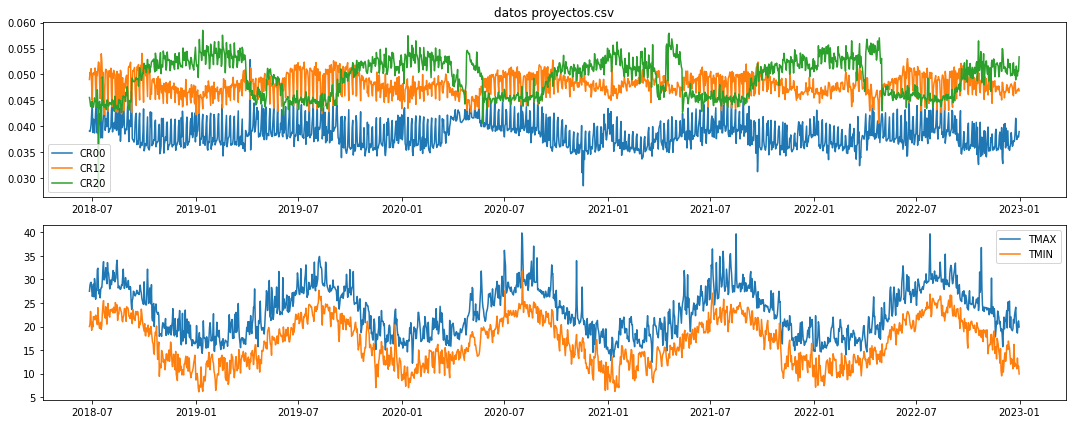

In [7]:
fig = plt.figure(1, figsize=(15,6)) # permite indicar el nº de la figura y las dimensiones (ancho y alto)
ax1 = plt.subplot(2,1,1)
plt.plot(fechas, df_orig.CR00, label='CR00')
plt.plot(fechas, df_orig.CR12, label='CR12')
plt.plot(fechas, df_orig.CR20, label='CR20')
plt.title(nom_fi_datos)
plt.legend()

plt.subplot(2,1,2,sharex= ax1)
plt.plot(fechas, df_orig.TMAX, label='TMAX')
plt.plot(fechas, df_orig.TMIN, label='TMIN')
plt.tight_layout()
plt.legend()

plt.show()

fig.savefig('figura1.pdf')

# PREGUNTAS DEL BULLET POINT 1

## Pregunta 1: ¿cómo es la distribución de los coeficientes en las horas 12, y 20?

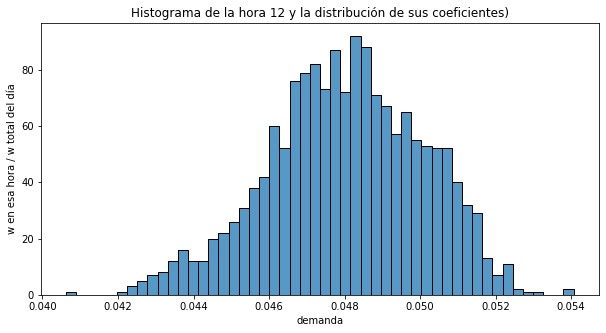

In [8]:
# Pregunta 1: ¿cómo es la distribución de los coeficientes en las horas 12, y 20?
nbins = 50 # número de intervalos, ajustar para buena visualización

fig = plt.figure(1, figsize=(10, 5)) # permite indicar el nº de la figura y las dimensiones (ancho y alto)
sns.histplot(data= df_orig['CR12'], bins=nbins)
# sns.rugplot(x, color='r')                            # opcional
plt.title(f'Histograma de la hora 12 y la distribución de sus coeficientes)')
plt.xlabel('demanda')
plt.ylabel('w en esa hora / w total del día')
plt.show()

In [9]:
print("Como se puede observar, la hora 12 tiene una gráfica con una distribución que puede asemajarse en cierto modo a una normal " "\n" " Además observamos que es asímetrica hacia la izquierda ")

Como se puede observar, la hora 12 tiene una gráfica con una distribución que puede asemajarse en cierto modo a una normal 
 Además observamos que es asímetrica hacia la izquierda 


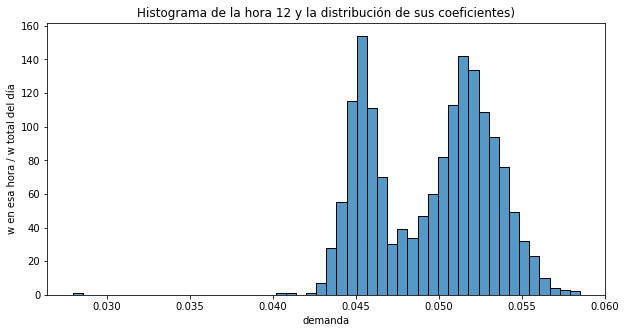

In [10]:
nbins = 50 # número de intervalos, ajustar para buena visualización

fig = plt.figure(1, figsize=(10, 5)) # permite indicar el nº de la figura y las dimensiones (ancho y alto)
sns.histplot(data= df_orig['CR20'], bins=nbins)
# sns.rugplot(x, color='r')                            # opcional
plt.title(f'Histograma de la hora 12 y la distribución de sus coeficientes)')
plt.xlabel('demanda')
plt.ylabel('w en esa hora / w total del día')
plt.show()

In [11]:
print("En la distribución de los coeficientes de la hora 20 encontramos una distribución algo más inusual, como si fueran 2 normales juntos " "\n" " Estudiaremos más adelante la razón de que esto ocurra.")

En la distribución de los coeficientes de la hora 20 encontramos una distribución algo más inusual, como si fueran 2 normales juntos 
 Estudiaremos más adelante la razón de que esto ocurra.


## Pregunta 2: ¿La distribución cambia con el día? ¿La hora? ¿El mes? ¿Si es festivo o no? 

In [12]:
# Pregunta 2: ¿La distribución cambia con el día? ¿La hora? ¿El mes? ¿Si es festivo o no? 

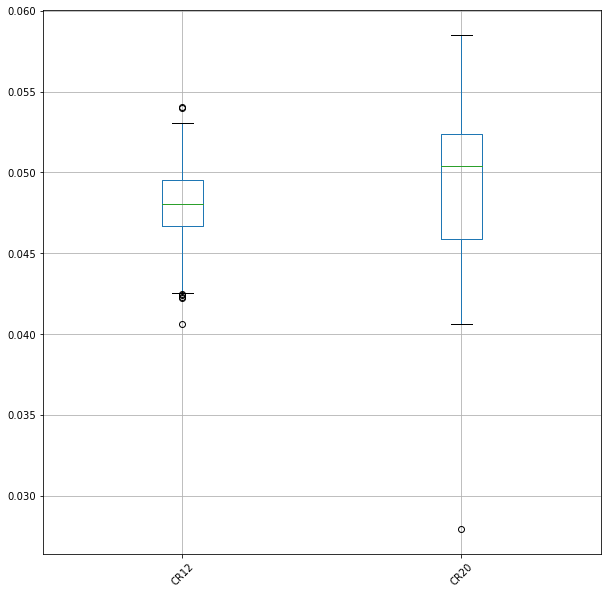

In [13]:
# crea dataframe con las variables (pueden ser más de dos)
df =  pd.DataFrame(list(zip(df_orig['CR12'], df_orig['CR20'])), columns=['CR12','CR20' ])
#print(df)

df.boxplot(figsize=(10, 10), rot=45) # con rot=0 las etiquetas del eje x no se inclinan
plt.show()

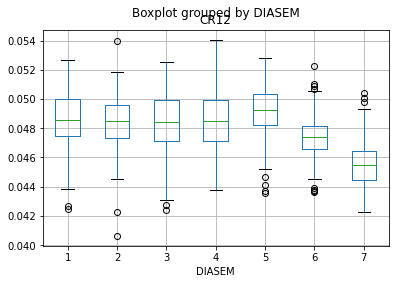

<Figure size 7200x7200 with 0 Axes>

In [14]:
# Vamos a evaluar en el siguiente gráfico de cajas, cómo varía la distribución de cada hora en función del día de la semana

df = df_orig
df.boxplot('CR12', by = 'DIASEM')
fig = plt.figure(100, figsize=(100, 100))
plt.show()

In [18]:
print("En los datos de la gráfica superior observamos que los jueves es el único día que no hay datos atípicos, " "\n" "asimismo, el vierse presenta la media más alta de demanda y el domingo la más baja," "\n" "en el resto de días semanales se mantine más o menos estable y se ve que baja draticamente en el fin de semana")

En los datos de la gráfica superior observamos que los jueves es el único día que no hay datos atípicos, 
asimismo, el vierse presenta la media más alta de demanda y el domingo la más baja,
en el resto de días semanales se mantine más o menos estable y se ve que baja draticamente en el fin de semana


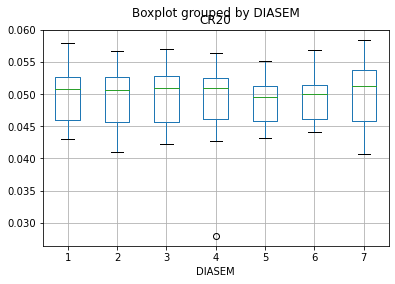

In [17]:
df = df_orig
df.boxplot('CR20', by = 'DIASEM')
fig = plt.figure(1, figsize=(100, 100))
plt.show()

In [19]:
print("Al contrario que en la hora 12 en la hora 20, se ve que la media de todos los días se mantiene algo similar" "\n" "Cabe destacar que en esta ocasión es el viernes el día que presenta la menor media y el domingo la que más.")

Al contrario que en la hora 12 en la hora 20, se ve que la media de todos los días se mantiene algo similar
Cabe destacar que en esta ocasión es el viernes el día que presenta la menor media y el domingo la que más.


In [ ]:
# En los siguientes diagramos de cajas, vamos a evaluar como cambia la distribución de cada hora por mes

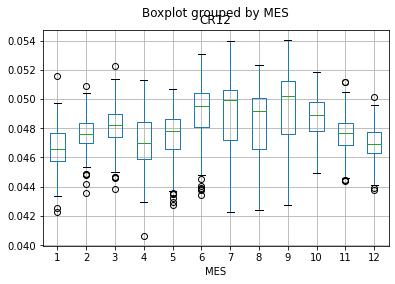

<Figure size 7200x7200 with 0 Axes>

In [21]:
df = df_orig
df.boxplot('CR12', by = 'MES')
fig = plt.figure(100, figsize=(100, 100))
plt.show()

In [ ]:
print("En la hora 12, observamos que en los meses de invierno, (diciembre - enero) la demanda media es mucho más baja que en los meses de verano (junio - septiembre)")

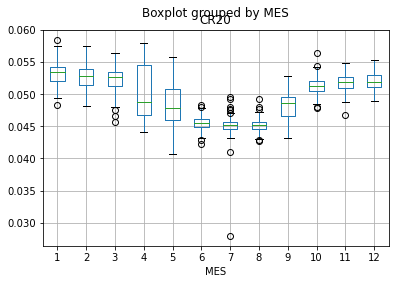

<Figure size 7200x7200 with 0 Axes>

In [20]:
df = df_orig
df.boxplot('CR20', by = 'MES')
fig = plt.figure(100, figsize=(100, 100))
plt.show()

In [22]:
print("En la hora 20, observamos que en los meses de invierno, (diciembre - enero) la demanda media es mucho más alta que en los meses de verano (junio - septiembre)")

En la hora 20, observamos que en los meses de invierno, (diciembre - enero) la demanda media es mucho más alta que en los meses de verano (junio - septiembre)


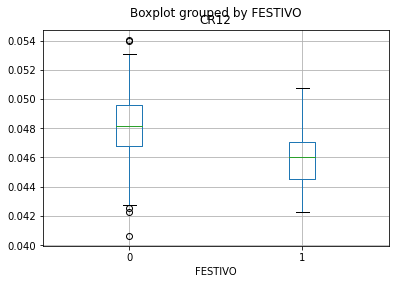

<Figure size 7200x7200 with 0 Axes>

In [25]:
df = df_orig
df.boxplot('CR12', by = 'FESTIVO')
fig = plt.figure(100, figsize=(100, 100))
plt.show()

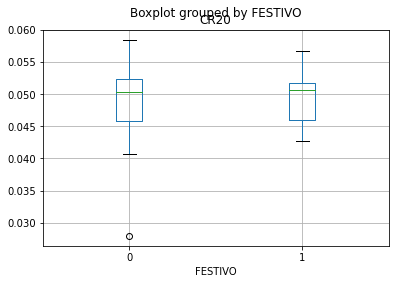

<Figure size 7200x7200 with 0 Axes>

In [26]:
df = df_orig
df.boxplot('CR20', by = 'FESTIVO')
fig = plt.figure(100, figsize=(100, 100))
plt.show()

## Pregunta 3: ¿Cuál es la relación de los coeficientes de cada hora con la temperatura máx.? ¿la min? ¿depende esto del día?

In [ ]:
# Pregunta 3: ¿Cuál es la relación de los coeficientes de cada hora con la temperatura máx.? ¿la min? ¿depende esto del día?

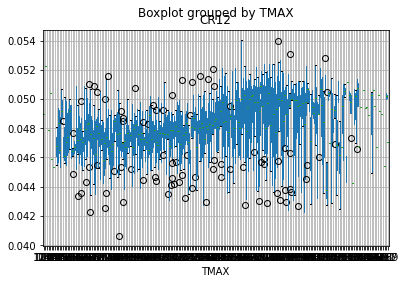

<Figure size 7200x7200 with 0 Axes>

In [28]:
df = df_orig
df.boxplot('CR12', by = 'TMAX')
fig = plt.figure(100, figsize=(100, 100))
plt.show()

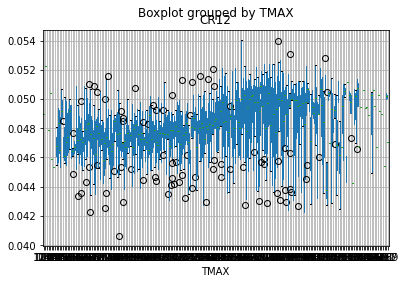

<Figure size 7.2e+09x7.2e+07 with 0 Axes>

In [32]:
df = df_orig
df.boxplot('CR12', by = 'TMAX')
fig = plt.figure(100, figsize=(100000000, 1000000))
plt.show()

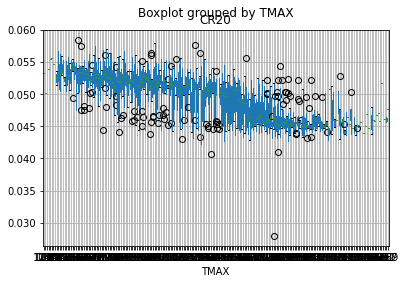

<Figure size 7200x7200 with 0 Axes>

In [29]:
df = df_orig
df.boxplot('CR20', by = 'TMAX')
fig = plt.figure(100, figsize=(100, 100))
plt.show()

Matriz correlaciones:
[[ 1.    -0.348]
 [-0.348  1.   ]]


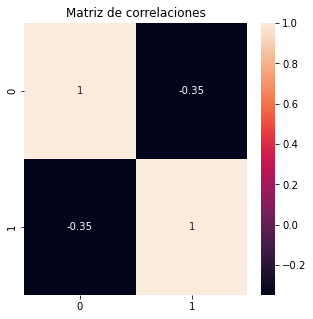

In [35]:
# matriz de correlaciones
mat_corr = np.corrcoef(df_orig['CR20'], df_orig['CR12'])                
print('Matriz correlaciones:')
print(np.round(mat_corr, 3)) # Redondeando a solo tres decimales para verlo mejor

# Muestra la matriz de correlaciones visualmente
fig = plt.figure(1,figsize=(5, 5))
sns.heatmap(mat_corr, annot=True) # si no se ven los textos con demasiadas variables, poner annot=False
plt.title('Matriz de correlaciones')
plt.show()

Matriz correlaciones:
[[ 1.    -0.707]
 [-0.707  1.   ]]


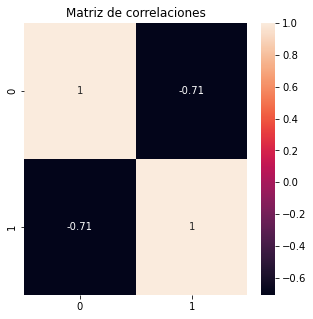

In [36]:
# matriz de correlaciones
mat_corr = np.corrcoef(df_orig['CR20'], df_orig['TMAX'])                
print('Matriz correlaciones:')
print(np.round(mat_corr, 3)) # Redondeando a solo tres decimales para verlo mejor

# Muestra la matriz de correlaciones visualmente
fig = plt.figure(1,figsize=(5, 5))
sns.heatmap(mat_corr, annot=True) # si no se ven los textos con demasiadas variables, poner annot=False
plt.title('Matriz de correlaciones')
plt.show()

Matriz correlaciones:
[[ 1.    -0.745]
 [-0.745  1.   ]]


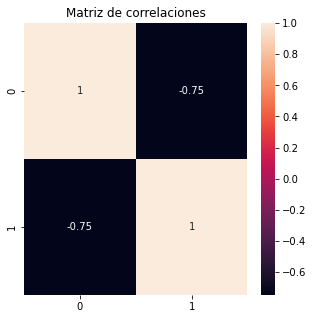

In [37]:
# matriz de correlaciones
mat_corr = np.corrcoef(df_orig['CR20'], df_orig['TMIN'])                
print('Matriz correlaciones:')
print(np.round(mat_corr, 3)) # Redondeando a solo tres decimales para verlo mejor

# Muestra la matriz de correlaciones visualmente
fig = plt.figure(1,figsize=(5, 5))
sns.heatmap(mat_corr, annot=True) # si no se ven los textos con demasiadas variables, poner annot=False
plt.title('Matriz de correlaciones')
plt.show()

Matriz correlaciones:
[[1.    0.291]
 [0.291 1.   ]]


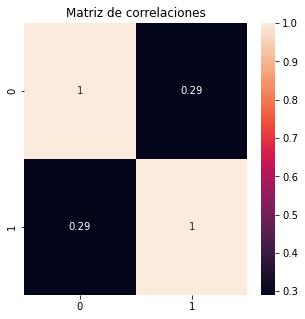

In [38]:
# matriz de correlaciones
mat_corr = np.corrcoef(df_orig['CR12'], df_orig['TMAX'])                
print('Matriz correlaciones:')
print(np.round(mat_corr, 3)) # Redondeando a solo tres decimales para verlo mejor

# Muestra la matriz de correlaciones visualmente
fig = plt.figure(1,figsize=(5, 5))
sns.heatmap(mat_corr, annot=True) # si no se ven los textos con demasiadas variables, poner annot=False
plt.title('Matriz de correlaciones')
plt.show()

Matriz correlaciones:
[[1.    0.329]
 [0.329 1.   ]]


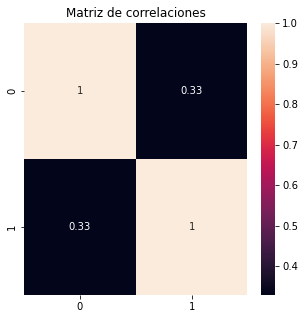

In [39]:
# matriz de correlaciones
mat_corr = np.corrcoef(df_orig['CR12'], df_orig['TMIN'])                
print('Matriz correlaciones:')
print(np.round(mat_corr, 3)) # Redondeando a solo tres decimales para verlo mejor

# Muestra la matriz de correlaciones visualmente
fig = plt.figure(1,figsize=(5, 5))
sns.heatmap(mat_corr, annot=True) # si no se ven los textos con demasiadas variables, poner annot=False
plt.title('Matriz de correlaciones')
plt.show()

In [40]:
# import tidyverse 
# library(tidyverse)

# dist_t(df.f = 3430, p = 1) + geom_vline(xintercept = 1.15)
# df <- 3430.8
# t_max <- stats::qt(p = 0.00001, df = df, lower.tail = F)
# t_alfa <- pt(q = 1.1584, df = df, lower.tail = F) *2
# t_observado <- 1.1584

# para_t <- tibble( x = seq(-t_max, t_max, length.out = 1000 * t_max),
#                  y = dt(x. df = df),
#                  alfa = ifelse(x <= t_alfa | x <= - t_alfa, "Es posible rechazar H0",
#                                "No es posible rechazar H0"))

# ggplot(para_t, aes(x = x, y = y)) + 
#     geom_ribbon(aes(ymax = y, ymin = 0, fill = alfa)) +
#     geom_vline(xintercept = t_obsevado) +
#     geom_text(x = t_obsevado - 0.1,
#               y = 0.2,
#               lavel = T obsevado = 1.15,
#               angle = 90) +
#     them(legend.postiion = "bottom")


# PARTE 2

Pregunta 1: ¿Cómo se relacionan los coeficientes de reparto de la hora 12 y de la hora 20?


Matriz correlaciones:
[[ 1.    -0.348]
 [-0.348  1.   ]]


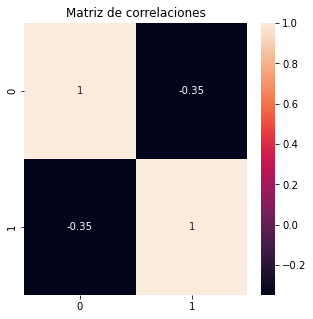

In [43]:
# matriz de correlaciones
mat_corr = np.corrcoef(df_orig['CR20'], df_orig['CR12'])                
print('Matriz correlaciones:')
print(np.round(mat_corr, 3)) # Redondeando a solo tres decimales para verlo mejor

# Muestra la matriz de correlaciones visualmente
fig = plt.figure(1,figsize=(5, 5))
sns.heatmap(mat_corr, annot=True) # si no se ven los textos con demasiadas variables, poner annot=False
plt.title('Matriz de correlaciones')
plt.show()

Como se puede observar en la matriz de correlaciones, se nos indica que existe una correlación negativa de 0.35 aprox. entre los coeficiente de la hora 12 y la hora 20.
En cualquier caso, este número no es siempre suficiente para determinar la correlación que existe entre particulares horas, por ello dibujaremos las siguientes nubes de puntos,
donde se nos mostrará una represantación mucho más visual tanto de la correlación como de los posibles atípicos que puede haber.

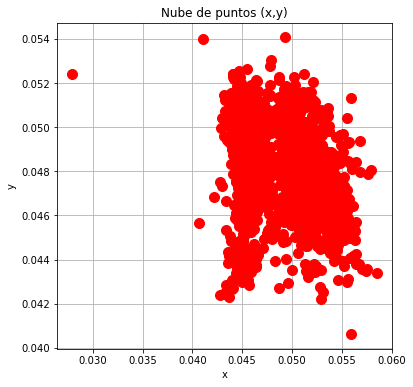

<Figure size 432x288 with 0 Axes>

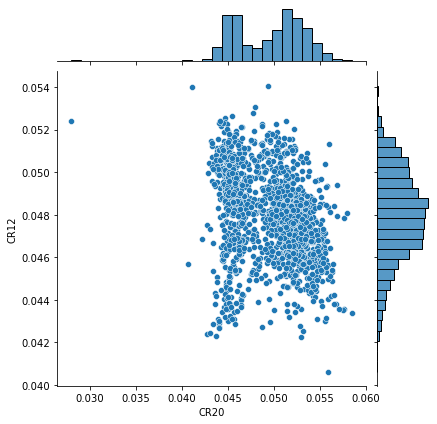

<Figure size 432x288 with 0 Axes>

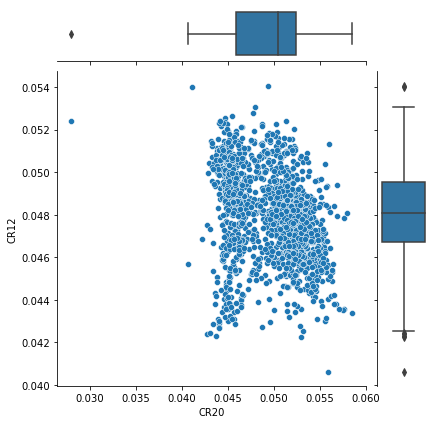

In [45]:
# scatterplot usando plt
fig = plt.figure(1, figsize=(6, 6))
plt.plot(df_orig['CR20'], df_orig['CR12'], '.', color='r', markersize = 20)
plt.title('Nube de puntos (x,y)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

# completando el scatter con los histogramas marginales
fig = plt.figure(2)
sns.jointplot(x= df_orig['CR20'], y=df_orig['CR12'])
plt.show()

# completando el scatter con los boxplots marginales
fig = plt.figure(3)
g = sns.JointGrid(x= df_orig['CR20'], y=df_orig['CR12'])
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.boxplot)
plt.show()

Observando ahora las gráficas superiores, especialmente la última donde vemos tanto la de puntos como los diagramas de cajas que nos muestran que mientras que en la hora 20 hay un único atípico, en la 12 encontramos muchos más, a continuación vamos a intentar estudiar el por qué de estos atípicos.

Pregunta 2: ¿Cómo se relacionan entre sí los 24 coeficientes de reparto? ¿Cuáles son las 4
horas más correlacionadas? ¿Se observan correlaciones no lineales entre horas?

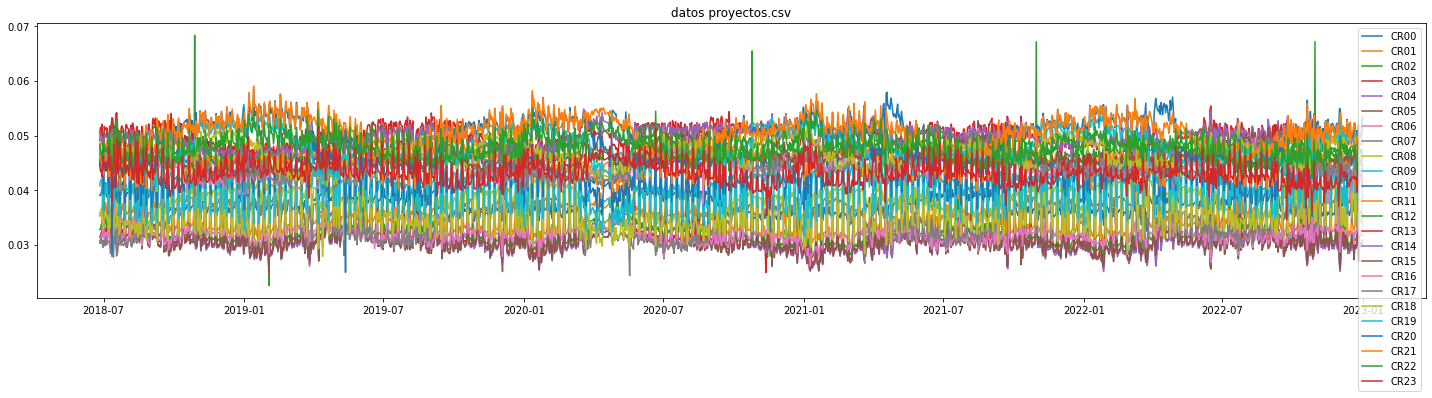

In [53]:
fig = plt.figure(1, figsize=(20,10)) # permite indicar el nº de la figura y las dimensiones (ancho y alto)
ax1 = plt.subplot(2,1,1)
plt.plot(fechas, df_orig.CR00, label='CR00')
plt.plot(fechas, df_orig.CR01, label='CR01')
plt.plot(fechas, df_orig.CR02, label='CR02')
plt.plot(fechas, df_orig.CR03, label='CR03')
plt.plot(fechas, df_orig.CR04, label='CR04')
plt.plot(fechas, df_orig.CR05, label='CR05')
plt.plot(fechas, df_orig.CR06, label='CR06')
plt.plot(fechas, df_orig.CR07, label='CR07')
plt.plot(fechas, df_orig.CR08, label='CR08')
plt.plot(fechas, df_orig.CR09, label='CR09')
plt.plot(fechas, df_orig.CR10, label='CR10')
plt.plot(fechas, df_orig.CR11, label='CR11')
plt.plot(fechas, df_orig.CR12, label='CR12')
plt.plot(fechas, df_orig.CR13, label='CR13')
plt.plot(fechas, df_orig.CR14, label='CR14')
plt.plot(fechas, df_orig.CR15, label='CR15')
plt.plot(fechas, df_orig.CR16, label='CR16')
plt.plot(fechas, df_orig.CR17, label='CR17')
plt.plot(fechas, df_orig.CR18, label='CR18')
plt.plot(fechas, df_orig.CR19, label='CR19')
plt.plot(fechas, df_orig.CR20, label='CR20')
plt.plot(fechas, df_orig.CR21, label='CR21')
plt.plot(fechas, df_orig.CR22, label='CR22')
plt.plot(fechas, df_orig.CR23, label='CR23')
#plt.plot(fechas, df_orig.CR24, label='CR24')
plt.title(nom_fi_datos)
plt.legend()

plt.tight_layout()
plt.legend()

plt.show()

fig.savefig('figura1.pdf')